Shrey Bhadja	      AU2140030
Jeel Kadivar	      AU2140181
Vishwa Joshi	      AU2140112
Kashish Jethmalani	AU2140029
Milan Godhaviya	    AU2140078


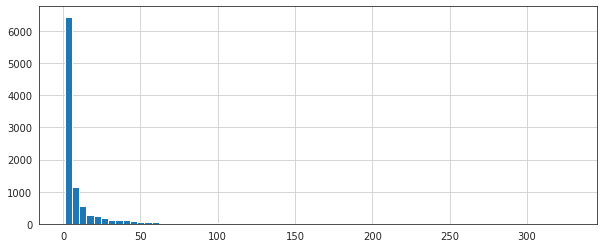

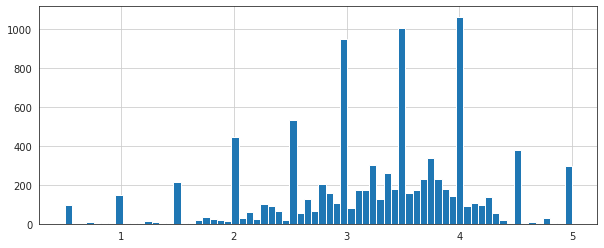

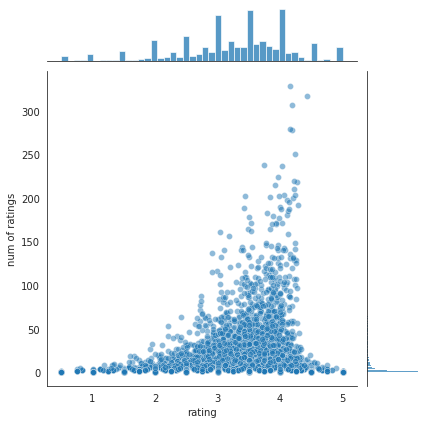

Movie:-Pacific Rim: Uprising
Released Year:-2018


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                             Correlation  num of ratings
title                                                                   
Aliens (1986)                                        1.0             126
Indiana Jones and the Temple of Doom (1984)          1.0             108
Monty Python and the Holy Grail (1975)               1.0             136
Titanic (1997)                                       1.0             140
Terminator, The (1984)                               1.0             131


In [ ]:
import pandas as pd

"""## Getting ratings from the Data"""

df = pd.read_csv('ratings.csv')
df.head()

"""Getting the movie titles from data"""

movieTitles = pd.read_csv("movies.csv")
movieTitles.head()

"""Merging ratings and movie titles"""

df = pd.merge(df,movieTitles,on='item_id')
df.head()


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

"""Creating a ratings dataframe with average rating and number of ratings:"""

df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

df.groupby('title')['rating'].count().sort_values(ascending=False).head()

mRatings = pd.DataFrame(df.groupby('title')['rating'].mean())
mRatings.head()

"""Creating the number of ratings column:"""

mRatings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
mRatings.head()

"""A few histograms:"""

plt.figure(figsize=(10,4))
mRatings['num of ratings'].hist(bins=70)

plt.figure(figsize=(10,4))
mRatings['rating'].hist(bins=70)

sns.jointplot(x='rating',y='num of ratings',data=mRatings,alpha=0.5)
plt.show()


"""
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.
"""

movieMatrix = df.pivot_table(index='user_id',columns='title',values='rating')
movieMatrix.head()

"""Sorting movies according to number of ratings"""

mRatings.sort_values('num of ratings',ascending=False).head(10)

mRatings.head()

def pearsonCorrelation(user1,user2):
    Numerator=0
    firstden=0
    u1r=uR.get(user1)
    u2r=uR.get(user2)
    seconddenominator=0
    for eachRatingOfUser1 in u1r.iteritems():
        if u2r.__contains__(eachRatingOfUser1[0]):
            eachRatingOfUser2=u2r.get(eachRatingOfUser1[0])
            Numerator+=(float(eachRatingOfUser1[1])-averagerating.get(user1)) * (float(eachRatingOfUser2)-averagerating.get(user2))
            firstden+=math.pow(float(eachRatingOfUser1[1])-averagerating.get(user1),2)
            seconddenominator+=math.pow(float(eachRatingOfUser2)-averagerating.get(user2),2)
    if firstden==0 and seconddenominator==0:
        ratingF=0
    else:
        ratingF=Numerator/(math.sqrt(firstden) * math.sqrt(seconddenominator)*1.0)
    return ratingF


def k_nn(user1,knn):
    similarTable={}
    knearestneighbours={}
    avgRating()
    for eachuser in uR.iteritems():
        if eachuser[0]!=user1:
            ratingF=pearsonCorrelation(user1,eachuser[0])
            similarTable[eachuser[0]]=ratingF
    listofneighbours=[k for k, v in sorted(similarTable.iteritems(), key=lambda(k, v): (-v, k))]
    for i in range(0,knn):
        user=listofneighbours[i]
        knearestneighbours[user]=similarTable.get(user)
    return knearestneighbours
def Recommend_movie(d):
    movie_user_ratings = movieMatrix[d]
    movie_user_ratings.head()

    """We can then use corrwith() method to get correlations between two pandas series:"""

    similarity_to_movie = movieMatrix.corrwith(movie_user_ratings)

    """Let's clean this by removing NaN values and using a DataFrame instead of a series:"""

    corr_movie = pd.DataFrame(similarity_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie.head()

    """Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies watched by only a few users. """

    corr_movie.sort_values('Correlation',ascending=False).head(10)

    """Let's fix this by filtering out movies that have less than 100 reviews."""

    corr_movie = corr_movie.join(mRatings['num of ratings'])
    corr_movie.head()

    """Now we will sort the values and notice how the titles make a lot more sense:"""

    print(corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head())

j=input("Movie:-")
k=input("Released Year:-")
d= j+" "+"("+k+")"
Recommend_movie(d)